### Loading data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import requests
from bs4 import BeautifulSoup

%matplotlib inline
import matplotlib

import re

**Import data** - Only Data from the last two and a half years are processed, as according to this article: https://igamingbusiness.com/esports/how-much-league-of-legends-data-is-enough-data/ this is the most sensible with the bi-weekly patches the game receives (changes to the game)

In [2]:
df_2021 = pd.read_csv('raw_data/2021_LoL_esports_Data.csv', parse_dates=['date'])
df_2022 = pd.read_csv('raw_data/2022_LoL_esports_Data.csv', parse_dates=['date'])
df_2023 = pd.read_csv('raw_data/2023_LoL_esports_Data.csv', parse_dates=['date'])

/tmp/ipykernel_1062/3943291304.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2022 = pd.read_csv('raw_data/2022_LoL_esports_Data.csv', parse_dates=['date'])
/tmp/ipykernel_1062/3943291304.py:3: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2023 = pd.read_csv('raw_data/2023_LoL_esports_Data.csv', parse_dates=['date'])


**Loading champion winrates**

In [3]:
url = "https://www.metasrc.com/5v5/stats?ranks=challenger"
r = requests.get(url)
andres = BeautifulSoup(r.text)
options = andres.find("select",id="patch").find_all("option")

def get_champion_data(url):
    r = requests.get(url)
    return pd.read_html(r.text)[0]

urls = []  # create an empty list to store the URLs
for option in options:
    value = option["value"]
    if float(value) >= 12.1:
        url = f"https://www.metasrc.com/5v5/{value}/stats?ranks=challenger"
        urls.append(url)
        new_value = value.replace(".","_")
        get_champion_data(url).to_csv(f"Champions_dataframe/patch_{new_value}.csv")
        
        
urls = []
for option in options:
    value = option["value"]
    if float(value) >= 12.1:
        url = f"https://www.metasrc.com/5v5/{value}/stats?ranks=challenger"
        new_value = value.replace(".", "_")
        champion_data = get_champion_data(url)
        champion_data["patch"] = value
        champion_data = champion_data[["Name", "Win %", "patch"]]
        champion_data.to_csv(f"Champions_dataframe/patch_{new_value}.csv")
        urls.append(champion_data)

# concatenate all the data frames into a single data frame
final_df = pd.concat(urls, ignore_index=True)

# save the final data frame to a single CSV file
final_df.to_csv("Champions_dataframe/all_patches.csv", index=False)

In [4]:
final_df["Win%"] = final_df["Win %"].str.rstrip('%')

final_df["Win%"] = pd.to_numeric(final_df["Win%"])

grouped_df = final_df.groupby(["patch", "Name"])["Win%"].mean().reset_index()

grouped_df.to_pickle("Champions_dataframe/win_and_champions_patch.pickle")

champions_wr_overview = grouped_df

output = []

for i in champions_wr_overview["Name"]:
    text = i
    output.append(text[:len(text)//2])

champions_wr_overview["name_clean"] = output
champions_wr_overview = champions_wr_overview.drop("Name", axis=1)

In [5]:
champions_wr_overview = grouped_df

output = []

for i in champions_wr_overview["Name"]:
    text = i
    output.append(text[:len(text)//2])

champions_wr_overview["name_clean"] = output
champions_wr_overview = champions_wr_overview.drop("Name", axis=1)
champions_wr_overview = champions_wr_overview.replace(['Nunu'], 'Eskimo')

**Filter data for most important leagues and team data only**

In [6]:
leagues_to_filter = ["LCS", "LEC", "LPL", "LCK", "PCS", "CBLOL", "LLA"]

# Filter the dataframe to include only the specified leagues
league_filtered_df_2021 = df_2021.loc[df_2021['league'].isin(leagues_to_filter)]
league_filtered_df_2022 = df_2022.loc[df_2022['league'].isin(leagues_to_filter)]
league_filtered_df_2023 = df_2023.loc[df_2023['league'].isin(leagues_to_filter)]

# Filter the dataframe to only include team-based data (not individual)
filtered_df_2021 = league_filtered_df_2021.loc[league_filtered_df_2021['position'].isin(["team"])]
filtered_df_2022 = league_filtered_df_2022.loc[league_filtered_df_2022['position'].isin(["team"])]
filtered_df_2023 = league_filtered_df_2023.loc[league_filtered_df_2023['position'].isin(["team"])]

# Concat the data for full live data
full_data = pd.concat([df_2022, df_2023])

# Filter the dataframe to only include champion data

patch_information = full_data.loc[full_data['participantid'].isin([1])].set_index('gameid')['patch']
champion_1 = full_data.loc[full_data['participantid'].isin([1])].set_index('gameid')['champion']
champion_2 = full_data.loc[full_data['participantid'].isin([2])].set_index('gameid')['champion']
champion_3 = full_data.loc[full_data['participantid'].isin([3])].set_index('gameid')['champion']
champion_4 = full_data.loc[full_data['participantid'].isin([4])].set_index('gameid')['champion']
champion_5 = full_data.loc[full_data['participantid'].isin([5])].set_index('gameid')['champion']
champion_6 = full_data.loc[full_data['participantid'].isin([6])].set_index('gameid')['champion']
champion_7 = full_data.loc[full_data['participantid'].isin([7])].set_index('gameid')['champion']
champion_8 = full_data.loc[full_data['participantid'].isin([8])].set_index('gameid')['champion']
champion_9 = full_data.loc[full_data['participantid'].isin([9])].set_index('gameid')['champion']
champion_10 = full_data.loc[full_data['participantid'].isin([10])].set_index('gameid')['champion']

champions_list = [patch_information,champion_1, 
               champion_2,
               champion_3,
               champion_4,
               champion_5,
               champion_6,
               champion_7,
               champion_8,
               champion_9,
               champion_10]

# Filter the dataframe to only include played id data

patch_information = full_data.loc[full_data['participantid'].isin([1])].set_index('gameid')['patch']
player_1 = full_data.loc[full_data['participantid'].isin([1])].set_index('gameid')['playerid']
player_2 = full_data.loc[full_data['participantid'].isin([2])].set_index('gameid')['playerid']
player_3 = full_data.loc[full_data['participantid'].isin([3])].set_index('gameid')['playerid']
player_4 = full_data.loc[full_data['participantid'].isin([4])].set_index('gameid')['playerid']
player_5 = full_data.loc[full_data['participantid'].isin([5])].set_index('gameid')['playerid']
player_6 = full_data.loc[full_data['participantid'].isin([6])].set_index('gameid')['playerid']
player_7 = full_data.loc[full_data['participantid'].isin([7])].set_index('gameid')['playerid']
player_8 = full_data.loc[full_data['participantid'].isin([8])].set_index('gameid')['playerid']
player_9 = full_data.loc[full_data['participantid'].isin([9])].set_index('gameid')['playerid']
player_10 = full_data.loc[full_data['participantid'].isin([10])].set_index('gameid')['playerid']

playerids_list = [patch_information,player_1, 
               player_2,
               player_3,
               player_4,
               player_5,
               player_6,
               player_7,
               player_8,
               player_9,
               player_10]


In [7]:
for i, series in enumerate(champions_list):
    if i == 0:   
        champions = pd.DataFrame(series)
        champions.columns = ["patch"]
    else:
        champions[f"player_{i}"] = series
        
champions = champions.dropna(axis=0)
champions = champions.replace(['Nunu & Willump'], 'Eskimo')

In [8]:
for i, series in enumerate(playerids_list):
    if i == 0:   
        players = pd.DataFrame(series)
        players.columns = ["patch"]
    else:
        players[f"player_{i}"] = series

**Historic experience**

In [9]:
# 2021

tmp = league_filtered_df_2021.loc[league_filtered_df_2021['participantid'].isin([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])]
tmp = tmp[['date', 'gameid', 'playerid', 'champion']].reset_index()
tmp = tmp.dropna()
tmp = tmp.set_index(['playerid', 'date', 'gameid', 'champion'])

historic_experience_2021 = tmp.groupby(['playerid']).count()

In [10]:
# 2022

tmp = league_filtered_df_2022.loc[league_filtered_df_2022['participantid'].isin([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])]
tmp = tmp[['date', 'gameid', 'playerid', 'champion']].reset_index()
tmp = tmp.dropna()
tmp = tmp.set_index(['playerid', 'date', 'gameid', 'champion'])

historic_experience_2022 = tmp.groupby(['playerid']).count()

**Dynamic experience**

In [11]:
# 2022

tmp = league_filtered_df_2022.loc[league_filtered_df_2022['participantid'].isin([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])]
tmp = tmp[['date', 'playerid', 'gameid', 'result']].reset_index().set_index(['playerid', 'date']).sort_index()
tmp = tmp.dropna()
player_games_played = pd.DataFrame()

# Need to adapt, so that the information is as before the game
player_games_played['total_games'] = tmp.groupby('playerid')['result'].cumcount()
tmp = pd.merge(tmp, player_games_played,  how='left', left_on=['date','playerid'], right_on = ['date','playerid'])

experience_2022 = tmp

In [12]:
# 2022

tmp = league_filtered_df_2023.loc[league_filtered_df_2023['participantid'].isin([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])]
tmp = tmp[['date', 'playerid', 'gameid', 'result']].reset_index().set_index(['playerid', 'date']).sort_index()
tmp = tmp.dropna()
player_games_played = pd.DataFrame()

# Need to adapt, so that the information is as before the game
player_games_played['total_games'] = tmp.groupby('playerid')['result'].cumcount()
tmp = pd.merge(tmp, player_games_played,  how='left', left_on=['date','playerid'], right_on = ['date','playerid'])

experience_2023 = tmp

In [13]:
mixed_exp_2022 = pd.merge(experience_2022.reset_index(), historic_experience_2021, how='left', left_on='playerid', right_on='playerid')
mixed_exp_2022 = mixed_exp_2022.fillna(value=0)
mixed_exp_2022['experience'] = mixed_exp_2022['total_games'] + mixed_exp_2022['index_y']

mixed_exp_2023 = pd.merge(experience_2023.reset_index(), historic_experience_2022, how='left', left_on='playerid', right_on='playerid')
mixed_exp_2023 = mixed_exp_2023.fillna(value=0)
mixed_exp_2023['experience'] = mixed_exp_2023['total_games'] + mixed_exp_2023['index_y']

experience = pd.concat([mixed_exp_2022, mixed_exp_2023], ignore_index=True).set_index(['gameid', 'playerid'])['experience']

In [14]:
exp_1 = pd.merge(players.reset_index(), experience, left_on=['gameid', 'player_1'], right_on=['gameid', 'playerid'])['experience']
exp_2 = pd.merge(players.reset_index(), experience, left_on=['gameid', 'player_2'], right_on=['gameid', 'playerid'])['experience']
exp_3 = pd.merge(players.reset_index(), experience, left_on=['gameid', 'player_3'], right_on=['gameid', 'playerid'])['experience']
exp_4 = pd.merge(players.reset_index(), experience, left_on=['gameid', 'player_4'], right_on=['gameid', 'playerid'])['experience']
exp_5 = pd.merge(players.reset_index(), experience, left_on=['gameid', 'player_5'], right_on=['gameid', 'playerid'])['experience']
exp_6 = pd.merge(players.reset_index(), experience, left_on=['gameid', 'player_6'], right_on=['gameid', 'playerid'])['experience']
exp_7 = pd.merge(players.reset_index(), experience, left_on=['gameid', 'player_7'], right_on=['gameid', 'playerid'])['experience']
exp_8 = pd.merge(players.reset_index(), experience, left_on=['gameid', 'player_8'], right_on=['gameid', 'playerid'])['experience']
exp_9 = pd.merge(players.reset_index(), experience, left_on=['gameid', 'player_9'], right_on=['gameid', 'playerid'])['experience']
exp_10 = pd.merge(players.reset_index(), experience, left_on=['gameid', 'player_10'], right_on=['gameid', 'playerid'])['experience']

exp_list = [
    champions.reset_index()['gameid'],
    exp_1,
    exp_2,
    exp_3,
    exp_4,
    exp_5,
    exp_6,
    exp_7,
    exp_8,
    exp_9,
    exp_10,
]

In [15]:
for i, series in enumerate(exp_list):
    if i == 0:   
        exp = pd.DataFrame(series)
        exp.columns = ["gameid"]
    else:
        exp[f"player_{i}"] = series
        
exp = exp.fillna(value=0)

In [16]:
exp['avg_blue_exp'] = (exp['player_1'] + exp['player_2'] + exp['player_3'] + exp['player_4'] + exp['player_5'])/5

In [17]:
exp['avg_red_exp'] = (exp['player_6'] + exp['player_7'] + exp['player_8'] + exp['player_9'] + exp['player_10'])/5

In [18]:
exp['exp_diff'] = exp['avg_blue_exp'] - exp['avg_red_exp']

In [19]:
exp = exp[['gameid', 'exp_diff']]

In [20]:
exp

,gameid,exp_diff
0,ESPORTSTMNT01_2690210,28.2
1,ESPORTSTMNT01_2690219,28.2
2,8401-8401_game_1,-42.4
3,ESPORTSTMNT01_2690227,-42.4
4,8401-8401_game_2,42.4
...,...,...
16566,ESPORTSTMNT01_3334332,0.0
16567,ESPORTSTMNT06_2778084,0.0
16568,ESPORTSTMNT01_3334356,0.0
16569,ESPORTSTMNT01_3333424,0.0


### Derivation of the "Win Rate Difference" Parameter

**Calculate historical win rate, defined as overall performance in last season**

In [21]:
# Group the DataFrame by team_id and count the number of games played
games_played_2022 = filtered_df_2022.groupby('teamid')['result'].count()
games_played_2021 = filtered_df_2021.groupby('teamid')['result'].count()

# Group the DataFrame by team_id and count the number of wins
wins_2022 = filtered_df_2022.groupby('teamid')['result'].sum()
wins_2021 = filtered_df_2021.groupby('teamid')['result'].sum()

# Calculate the win rate for each team
win_rates_in_2022 = (wins_2022 / games_played_2022) * 100
win_rates_in_2021 = (wins_2021 / games_played_2021) * 100

In [22]:
tmp_1 = pd.DataFrame(filtered_df_2022.groupby('teamid').count().iloc[:, 0])
tmp_2 = pd.DataFrame(filtered_df_2023.groupby('teamid').count().iloc[:, 0])

historical_wr_2022 = pd.merge(tmp_1, win_rates_in_2021, how='left', left_index=True, right_index=True)
historical_wr_2023 = pd.merge(tmp_2, win_rates_in_2022, how='left', left_index=True, right_index=True)

historical_wr_2022.fillna(value=historical_wr_2022['result'].mean(), inplace=True)
historical_wr_2023.fillna(value=historical_wr_2023['result'].mean(), inplace=True)

**Calculate dynamic win rate throughout the season, defined as games won divided by games played so far this season**

In [23]:
# Number of games until only current season counts as win rate:
n_games = 10

In [24]:
# 2022
tmp = filtered_df_2022[['date', 'teamid', 'gameid', 'result']].reset_index().set_index(['teamid', 'date']).sort_index()
games_played_dynamic = pd.DataFrame()

# Need to adapt, so that the information is as before the game
games_played_dynamic['total_games'] = tmp.groupby('teamid')['result'].cumcount()
games_played_dynamic['dynamic_weighting'] = np.clip(0, games_played_dynamic['total_games']/n_games, 1) # dynamic weighting factor
games_won_dynamic = pd.DataFrame(tmp.groupby('teamid')['result'].shift()).groupby('teamid')['result'].cumsum()

tmp = pd.merge(tmp, games_played_dynamic,  how='left', left_on=['date','teamid'], right_on = ['date','teamid'])
tmp = pd.merge(tmp, games_won_dynamic, how='left', left_on=['date','teamid'], right_on = ['date','teamid'])
tmp['dynamic_wr'] = tmp['result_y'] / tmp['total_games'] * 100

# If no data available (new teams) replace with average of 50%
tmp['dynamic_wr'] = tmp['dynamic_wr'].replace([np.inf, -np.inf], np.nan)
tmp['dynamic_wr'] = tmp['dynamic_wr'].fillna(value=50)

dynamic_wr_2022 = tmp

# 2023
tmp = filtered_df_2023[['date', 'teamid', 'gameid', 'result']].reset_index().set_index(['teamid', 'date']).sort_index()
games_played_dynamic = pd.DataFrame()

# Need to adapt, so that the information is as before the game
games_played_dynamic['total_games'] = tmp.groupby('teamid')['result'].cumcount()
games_played_dynamic['dynamic_weighting'] = np.clip(0, games_played_dynamic['total_games']/n_games, 1) # dynamic weighting factor
games_won_dynamic = pd.DataFrame(tmp.groupby('teamid')['result'].shift()).groupby('teamid')['result'].cumsum()

tmp = pd.merge(tmp, games_played_dynamic,  how='left', left_on=['date','teamid'], right_on = ['date','teamid'])
tmp = pd.merge(tmp, games_won_dynamic, how='left', left_on=['date','teamid'], right_on = ['date','teamid'])
tmp['dynamic_wr'] = tmp['result_y'] / tmp['total_games'] * 100

# If no data available (new teams) replace with average of 50%
tmp['dynamic_wr'] = tmp['dynamic_wr'].replace([np.inf, -np.inf], np.nan)
tmp['dynamic_wr'] = tmp['dynamic_wr'].fillna(value=50)

dynamic_wr_2023 = tmp

**Mixing historical and dynamic win rate to arrive at an expected win rate prior to the game**

In [25]:
wr_2022 = pd.merge(dynamic_wr_2022, historical_wr_2022, how='left', left_on='teamid', right_on='teamid').reset_index()
wr_2022['mixed_wr'] = wr_2022['dynamic_wr'] * wr_2022['dynamic_weighting'] + wr_2022['result'] * (1 - wr_2022['dynamic_weighting'])


wr_2023 = pd.merge(dynamic_wr_2023, historical_wr_2023, how='left', left_on='teamid', right_on='teamid').reset_index()
wr_2023['mixed_wr'] = wr_2023['dynamic_wr'] * wr_2022['dynamic_weighting'] + wr_2023['result'] * (1 - wr_2022['dynamic_weighting'])

wr = pd.concat([wr_2022, wr_2023], ignore_index=True).set_index(['gameid_x', 'teamid'])['mixed_wr']

### Derivation of the "Gold spend difference percentage" parameter

**Historical gspd**

In [26]:
# 2022
tmp = pd.DataFrame(filtered_df_2022.groupby('teamid').count().iloc[:, 0])
gspd_in_2021 = filtered_df_2021.groupby('teamid')['gspd'].mean() * 100
historical_gspd_2022 = pd.merge(tmp, gspd_in_2021, how='left', left_index=True, right_index=True)
historical_gspd_2022.fillna(value=0, inplace=True)

# 2023
tmp = pd.DataFrame(filtered_df_2023.groupby('teamid').count().iloc[:, 0])
gspd_in_2022 = filtered_df_2022.groupby('teamid')['gspd'].mean() * 100
historical_gspd_2023 = pd.merge(tmp, gspd_in_2022, how='left', left_index=True, right_index=True)
historical_gspd_2023.fillna(value=0, inplace=True)
historical_gspd_2023

,gameid,gspd
teamid,,
oe:team:056c3140a119e44a03d462e2c832f27,39,4.796039
oe:team:0916b3c324c8577b0c6344f3e067f62,22,11.244567
oe:team:0a9aa50beea19fcbc6b939fe6b94f08,14,1.278197
oe:team:0b27fc98592297c4441bce44760a642,6,0.000000
oe:team:0b65555ba9e97910fc1e7264a99fa24,45,-3.078771
...,...,...
oe:team:f73cbd69433514d61cf7c9cd0f5123a,44,0.000000
oe:team:f7c0f545d3fc1860239d04b3ebe97f8,18,-15.077901
oe:team:f7f7324c151aa6ed770b244ce08e027,22,5.444246


**Dynamic gspd troughout the season**

In [27]:
tmp = filtered_df_2022[['date', 'teamid', 'gameid', 'gspd']].reset_index().set_index(['teamid', 'date']).sort_index()
tmp

index  \
teamid                                  date                          
oe:team:056c3140a119e44a03d462e2c832f27 2022-01-11 09:19:52     659   
                                        2022-01-11 10:07:46     683   
                                        2022-01-15 07:19:56    2663   
                                        2022-01-15 08:04:52    2675   
                                        2022-01-18 11:49:35    3911   
...                                                             ...   
oe:team:fcec508e780bbd1ad493852640f5b36 2022-09-01 09:19:25  130607   
                                        2022-09-01 10:18:46  130654   
                                        2022-09-01 11:33:44  130703   
                                        2022-09-01 12:32:57  130738   
                                        2022-09-01 13:37:42  130751   

                                                                       gameid  \
teamid                                  date                                    
oe:team:056c3140a119e44a03d462e2c832f27 2022-01-11 09:19:52  8403-8403_game_1   
                                        2022-01-11 10:07:46  8403-8403_game_2   
                                        2022-01-15 07:19:56  8412-8412_game_1   
                                        2022-01-15 08:04:52  8412-8412_game_2   
                                        2022-01-18 11:49:35  8421-8421_game_1   
...                                                                       ...   
oe:team:fcec508e780bbd1ad493852640f5b36 2022-09-01 09:19:25  9362-9362_game_1   
                                        2022-09-01 10:18:46  9362-9362_game_2   
                                        2022-09-01 11:33:44  9362-9362_game_3   
                                        2022-09-01 12:32:57  9362-9362_game_4   
                                        2022-09-01 13:37:42  9362-9362_game_5   

                                                                 gspd  
teamid                                  date                           
oe:team:056c3140a119e44a03d462e2c832f27 2022-01-11 09:19:52  0.141056  
                                        2022-01-11 10:07:46  0.147540  
                                        2022-01-15 07:19:56  0.227674  
                                        2022-01-15 08:04:52  0.202819  
                                        2022-01-18 11:49:35  0.176677  
...                                                               ...  
oe:team:fcec508e780bbd1ad493852640f5b36 2022-09-01 09:19:25 -0.071824  
                                        2022-09-01 10:18:46 -0.003083  
                                        2022-09-01 11:33:44 -0.016159  
                                        2022-09-01 12:32:57  0.071786  
                                        2022-09-01 13:37:42 -0.045600  

[5006 rows x 3 columns]

In [28]:
tmp.groupby('teamid').cumcount() 

teamid                                   date               
oe:team:056c3140a119e44a03d462e2c832f27  2022-01-11 09:19:52      0
                                         2022-01-11 10:07:46      1
                                         2022-01-15 07:19:56      2
                                         2022-01-15 08:04:52      3
                                         2022-01-18 11:49:35      4
                                                               ... 
oe:team:fcec508e780bbd1ad493852640f5b36  2022-09-01 09:19:25    117
                                         2022-09-01 10:18:46    118
                                         2022-09-01 11:33:44    119
                                         2022-09-01 12:32:57    120
                                         2022-09-01 13:37:42    121
Length: 5006, dtype: int64

In [29]:
# 2022
tmp = filtered_df_2022[['date', 'teamid', 'gameid', 'gspd']].reset_index().set_index(['teamid', 'date']).sort_index()
games_played_dynamic = pd.DataFrame()

# Need to adapt, so that the information is as before the game
games_played_dynamic['total_games'] = tmp.groupby('teamid')['gspd'].cumcount() 
games_played_dynamic['dynamic_weighting'] = np.clip(0, games_played_dynamic['total_games']/n_games, 1) # dynamic weighting factor
gspd_dynamic = pd.DataFrame(tmp.groupby('teamid')['gspd'].shift()).groupby('teamid')['gspd'].cumsum()

tmp = pd.merge(tmp, games_played_dynamic,  how='left', left_on=['date','teamid'], right_on = ['date','teamid'])
tmp = pd.merge(tmp, gspd_dynamic, how='left', left_on=['date','teamid'], right_on = ['date','teamid'])
tmp['dynamic_gspd'] = tmp['gspd_y'] / tmp['total_games'] * 100

tmp.fillna(value=0, inplace=True)
dynamic_gspd_2022 = tmp

# 2023
tmp = filtered_df_2023[['date', 'teamid', 'gameid', 'gspd']].reset_index().set_index(['teamid', 'date']).sort_index()
games_played_dynamic = pd.DataFrame()

# Need to adapt, so that the information is as before the game
games_played_dynamic['total_games'] = tmp.groupby('teamid')['gspd'].cumcount()
games_played_dynamic['dynamic_weighting'] = np.clip(0, games_played_dynamic['total_games']/n_games, 1) # dynamic weighting factor
gspd_dynamic = pd.DataFrame(tmp.groupby('teamid')['gspd'].shift()).groupby('teamid')['gspd'].cumsum()

tmp = pd.merge(tmp, games_played_dynamic,  how='left', left_on=['date','teamid'], right_on = ['date','teamid'])
tmp = pd.merge(tmp, gspd_dynamic, how='left', left_on=['date','teamid'], right_on = ['date','teamid'])
tmp['dynamic_gspd'] = tmp['gspd_y'] / tmp['total_games'] * 100

tmp.fillna(value=0, inplace=True)
dynamic_gspd_2023 = tmp

**Mixing historical and dynamic gspd and concating 2022 and 2023 data**

In [30]:
gspd_2022 = pd.merge(dynamic_gspd_2022, historical_gspd_2022, how='left', left_on='teamid', right_on='teamid').reset_index()
gspd_2022['mixed_gspd'] = gspd_2022['dynamic_gspd'] * gspd_2022['dynamic_weighting'] + gspd_2022['gspd'] * (1 - gspd_2022['dynamic_weighting'])

gspd_2023 = pd.merge(dynamic_gspd_2023, historical_gspd_2023, how='left', left_on='teamid', right_on='teamid').reset_index()
gspd_2023['mixed_gspd'] = gspd_2023['dynamic_gspd'] * gspd_2022['dynamic_weighting'] + gspd_2023['gspd'] * (1 - gspd_2022['dynamic_weighting'])

gspd = pd.concat([gspd_2022, gspd_2023], ignore_index=True).set_index(['gameid_x', 'teamid'])['mixed_gspd']

gspd.replace([np.inf, -np.inf], np.nan, inplace=True)
gspd = gspd.fillna(method='bfill')

### Derivation of the "Standardized vision score difference" parameter

### Derivation of the "Champion winrate difference" parameter

In [31]:
mapping = [
    ['12.1', 12.01],
    ['12.2', 12.02],
    ['12.3', 12.03],
    ['12.4', 12.04],
    ['12.5', 12.05],
    ['12.6', 12.06],
    ['12.7', 12.07],
    ['12.8', 12.08],
    ['12.9', 12.09],
    ['12.10', 12.1],
    ['12.11', 12.11],
    ['12.12', 12.12],
    ['12.13', 12.13],
    ['12.14', 12.14],
    ['12.15', 12.15],
    ['12.16', 12.16],
    ['12.17', 12.17],
    ['12.18', 12.18],
    ['12.19', 12.19],
    ['12.20', 12.2],
    ['12.21', 12.21],
    ['12.22', 12.22],
    ['12.23', 12.23],
    ['13.1', 13.01],
    ['13.2', 13.02],
    ['13.3', 13.03],
    ['13.4', 13.04],
    ['13.5', 13.05]
]

In [32]:
map_df = pd.DataFrame(mapping, columns=['overview', 'raw_data_patch'])

In [33]:
champions_wr_overview

,patch,Win%,name_clean
0,12.1,53.310,Aatrox
1,12.1,50.000,Ahri
2,12.1,51.955,Akali
3,12.1,55.135,Akshan
4,12.1,53.260,Alistar
...,...,...,...
4486,13.6,52.760,Zeri
4487,13.6,41.810,Ziggs
4488,13.6,50.980,Zilean
4489,13.6,59.800,Zoe


In [34]:
champions_wr_overview = pd.merge(champions_wr_overview, map_df, left_on='patch', right_on='overview')
champions_wr_overview = champions_wr_overview.drop(["patch", "overview"], axis=1)
champions_wr_overview = champions_wr_overview.set_index(["raw_data_patch", "name_clean"])

In [35]:
for i, series in enumerate(players):
    if i == 0:   
        champions = pd.DataFrame(series)
        champions.columns = ["patch"]
    else:
        champions[f"player_{i}"] = series

champions = champions.dropna(axis=0)
champions = champions.replace(['Nunu & Willump'], 'Eskimo')

ValueError: DataFrame constructor not properly called!

In [37]:
champions = champions.dropna(axis=0)
champions = champions.replace(['Nunu & Willump'], 'Eskimo')

In [38]:
wr_chmp_player_1 = pd.merge(champions.reset_index(), champions_wr_overview, how='left', left_on=['patch', 'player_1'], right_on=['raw_data_patch', 'name_clean'])["Win%"]
wr_chmp_player_2 = pd.merge(champions.reset_index(), champions_wr_overview, how='left', left_on=['patch', 'player_2'], right_on=['raw_data_patch', 'name_clean'])["Win%"]
wr_chmp_player_3 = pd.merge(champions.reset_index(), champions_wr_overview, how='left', left_on=['patch', 'player_3'], right_on=['raw_data_patch', 'name_clean'])["Win%"]
wr_chmp_player_4 = pd.merge(champions.reset_index(), champions_wr_overview, how='left', left_on=['patch', 'player_4'], right_on=['raw_data_patch', 'name_clean'])["Win%"]
wr_chmp_player_5 = pd.merge(champions.reset_index(), champions_wr_overview, how='left', left_on=['patch', 'player_5'], right_on=['raw_data_patch', 'name_clean'])["Win%"]
wr_chmp_player_6 = pd.merge(champions.reset_index(), champions_wr_overview, how='left', left_on=['patch', 'player_6'], right_on=['raw_data_patch', 'name_clean'])["Win%"]
wr_chmp_player_7 = pd.merge(champions.reset_index(), champions_wr_overview, how='left', left_on=['patch', 'player_7'], right_on=['raw_data_patch', 'name_clean'])["Win%"]
wr_chmp_player_8 = pd.merge(champions.reset_index(), champions_wr_overview, how='left', left_on=['patch', 'player_8'], right_on=['raw_data_patch', 'name_clean'])["Win%"]
wr_chmp_player_9 = pd.merge(champions.reset_index(), champions_wr_overview, how='left', left_on=['patch', 'player_9'], right_on=['raw_data_patch', 'name_clean'])["Win%"]
wr_chmp_player_10 = pd.merge(champions.reset_index(), champions_wr_overview, how='left', left_on=['patch', 'player_10'], right_on=['raw_data_patch', 'name_clean'])["Win%"]

wr_chmp_player_1 = wr_chmp_player_1.replace([np.nan, 0],50)
wr_chmp_player_2 = wr_chmp_player_2.replace([np.nan, 0],50)
wr_chmp_player_3 = wr_chmp_player_3.replace([np.nan, 0],50)
wr_chmp_player_4 = wr_chmp_player_4.replace([np.nan, 0],50)
wr_chmp_player_5 = wr_chmp_player_5.replace([np.nan, 0],50)
wr_chmp_player_6 = wr_chmp_player_6.replace([np.nan, 0],50)
wr_chmp_player_7 = wr_chmp_player_7.replace([np.nan, 0],50)
wr_chmp_player_8 = wr_chmp_player_8.replace([np.nan, 0],50)
wr_chmp_player_9 = wr_chmp_player_9.replace([np.nan, 0],50)
wr_chmp_player_10 = wr_chmp_player_10.replace([np.nan, 0],50)

In [39]:
wr_chmp_list = [
    champions.reset_index()['gameid'],
    wr_chmp_player_1,
    wr_chmp_player_2,
    wr_chmp_player_3,
    wr_chmp_player_4,
    wr_chmp_player_5,
    wr_chmp_player_6,
    wr_chmp_player_7,
    wr_chmp_player_8,
    wr_chmp_player_9,
    wr_chmp_player_10,
]

In [40]:
for i, series in enumerate(wr_chmp_list):
    if i == 0:   
        chmp_wr = pd.DataFrame(series)
        chmp_wr.columns = ["gameid"]
    else:
        chmp_wr[f"player_{i}"] = series

In [41]:
chmp_wr['avg_blue_champion_wr'] = (chmp_wr['player_1'] + chmp_wr['player_2'] + chmp_wr['player_3'] + chmp_wr['player_4'] + chmp_wr['player_5'])/5

In [42]:
chmp_wr['avg_red_champion_wr'] = (chmp_wr['player_6'] + chmp_wr['player_7'] + chmp_wr['player_8'] + chmp_wr['player_9'] + chmp_wr['player_10'])/5

In [43]:
chmp_wr['chmp_wr_diff'] = chmp_wr['avg_blue_champion_wr'] - chmp_wr['avg_red_champion_wr']

In [44]:
chmp_wr = chmp_wr[['gameid', 'chmp_wr_diff']]

### Summarizing the results and parameters from perspective of blue

In [45]:
only_blue_2022 = filtered_df_2022.loc[filtered_df_2022['side'].isin(["Blue"])].set_index('gameid')
only_red_2022 = filtered_df_2022.loc[filtered_df_2022['side'].isin(["Red"])].set_index('gameid')

only_blue_2023 = filtered_df_2023.loc[filtered_df_2023['side'].isin(["Blue"])].set_index('gameid')
only_red_2023 = filtered_df_2023.loc[filtered_df_2023['side'].isin(["Red"])].set_index('gameid')

blue_vs_red_2022 = pd.merge(only_blue_2022['teamid'], only_red_2022['teamid'], how='left', left_index=True, right_index=True)
blue_vs_red_2023 = pd.merge(only_blue_2023['teamid'], only_red_2023['teamid'], how='left', left_index=True, right_index=True)

blue_vs_red = pd.concat([blue_vs_red_2022, blue_vs_red_2023]).reset_index()
blue_results = pd.concat([only_blue_2022[['result']], only_blue_2023[['result']]]).reset_index()

In [46]:
blue_vs_red

,gameid,teamid_x,teamid_y
0,8401-8401_game_1,oe:team:f4c4528c6981e104a11ea7548630c23,oe:team:df80f468a3f9a722df056fe9104f052
1,8401-8401_game_2,oe:team:f4c4528c6981e104a11ea7548630c23,oe:team:df80f468a3f9a722df056fe9104f052
2,8402-8402_game_1,oe:team:33d17f3717f58e12a3da80b377221fb,oe:team:73f3126d91d35faa5d5ce34abadb865
3,8402-8402_game_2,oe:team:33d17f3717f58e12a3da80b377221fb,oe:team:73f3126d91d35faa5d5ce34abadb865
4,8402-8402_game_3,oe:team:73f3126d91d35faa5d5ce34abadb865,oe:team:33d17f3717f58e12a3da80b377221fb
...,...,...,...
3581,ESPORTSTMNT01_3335201,oe:team:cbfaf0ca2181f0903d2fcceb6c28f3b,oe:team:f7f7324c151aa6ed770b244ce08e027
3582,ESPORTSTMNT01_3333294,oe:team:cbfaf0ca2181f0903d2fcceb6c28f3b,oe:team:f7f7324c151aa6ed770b244ce08e027
3583,ESPORTSTMNT01_3333302,oe:team:cbfaf0ca2181f0903d2fcceb6c28f3b,oe:team:f7f7324c151aa6ed770b244ce08e027
3584,ESPORTSTMNT06_2778084,oe:team:7338408a0fe0217451d2c9a567db999,oe:team:8f995652631df209ff11c4542abdcaf


In [47]:
# Merge the blue side data (controlled by 'teamid_x' on the left side)
model_df = pd.merge(blue_vs_red, wr, left_on=['gameid', 'teamid_x'], right_on=['gameid_x', 'teamid']) # wr blue side
model_df = pd.merge(model_df, gspd, left_on=['gameid', 'teamid_x'], right_on=['gameid_x', 'teamid']) # gspd blue side

# Merge the blue side data (controlled by 'teamid_y' on the left side)
model_df = pd.merge(model_df, wr, left_on=['gameid', 'teamid_y'], right_on=['gameid_x', 'teamid']) # wr red side
model_df = pd.merge(model_df, gspd, left_on=['gameid', 'teamid_y'], right_on=['gameid_x', 'teamid']) # gspd red side

# Merge the results from blue perspective
model_df = pd.merge(model_df, blue_results, left_on=['gameid'], right_on=['gameid'])

In [48]:
model_df['wr_diff'] = model_df['mixed_wr_x'] - model_df['mixed_wr_y']
model_df['gspd_diff'] = model_df['mixed_gspd_x'] - model_df['mixed_gspd_y']

# Merge the champion wr difference
model_df = pd.merge(model_df, chmp_wr, left_on='gameid', right_on='gameid')

# Merge the player experience difference
model_df = pd.merge(model_df, exp, left_on='gameid', right_on='gameid')

model_df = model_df.drop(['teamid_x', 'teamid_y', 'mixed_wr_x', 'mixed_gspd_x', 'mixed_wr_y', 'mixed_gspd_y'], axis=1)
model_df = model_df.set_index('gameid')

In [49]:
model_df

,result,wr_diff,gspd_diff,chmp_wr_diff,exp_diff
gameid,,,,,
8401-8401_game_1,1,10.947657,-0.720457,1.322000,-42.4
8401-8401_game_2,1,19.852891,-0.765656,0.932667,42.4
8402-8402_game_1,1,2.230769,1.290830,0.303000,-34.2
8402-8402_game_2,0,12.007692,4.148187,-0.188000,10.8
8402-8402_game_3,0,-1.784615,-3.824256,1.592000,-10.8
...,...,...,...,...,...
ESPORTSTMNT01_3335201,0,-14.358736,-5.384133,-0.759000,0.0
ESPORTSTMNT01_3333294,0,-15.934109,-5.613870,1.272000,0.0
ESPORTSTMNT01_3333302,0,-17.710963,-5.576791,-0.833000,0.0


In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [78]:
train = model_df[0:2800]
test = model_df[2800:]

In [98]:
X_train = train[['wr_diff', 'gspd_diff']]
y_train = train['result']

X_test = test[['wr_diff', 'gspd_diff']]
y_test = test['result']

In [99]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [100]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [101]:
model.score(X_test, y_test)

0.6501272264631043

In [112]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=65)
neigh.fit(X_train_std, y_train)

KNeighborsClassifier(n_neighbors=65)

In [113]:
neigh.score(X_test_std, y_test)

0.6552162849872774

In [114]:
from sklearn.linear_model import SGDClassifier
svc_bis = SGDClassifier(loss='hinge', penalty='l2', alpha=1/10)

In [115]:
svc_bis.fit(X_train_std, y_train)

SGDClassifier(alpha=0.1)

In [118]:
svc_bis.score(X_test_std, y_test)

0.549618320610687

<AxesSubplot:xlabel='wr_diff', ylabel='Count'>

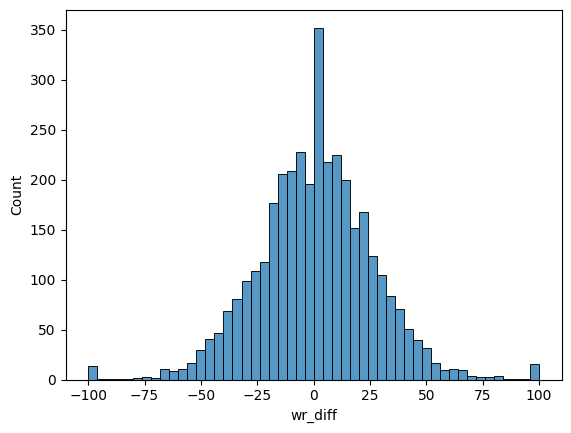

In [70]:
sns.histplot(model_df['wr_diff'])

<AxesSubplot:xlabel='chmp_wr_diff', ylabel='Count'>

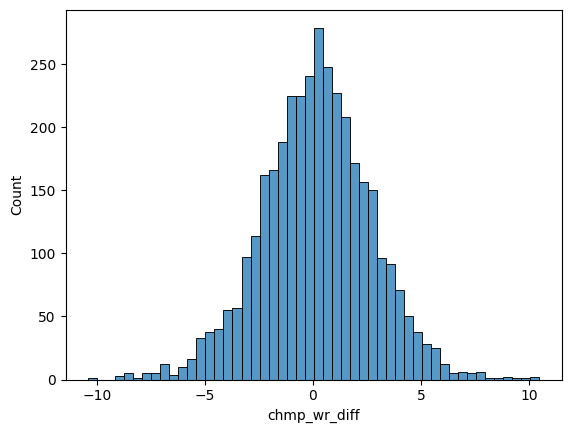

In [71]:
sns.histplot(model_df['chmp_wr_diff'])

<AxesSubplot:xlabel='exp_diff', ylabel='Count'>

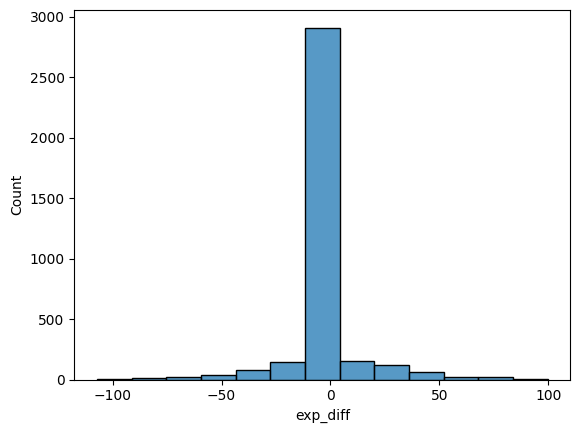

In [72]:
sns.histplot(model_df['exp_diff'])